In [3]:
#PART I: Draw a plot chart to see if there is a trend. If there is, then performing differencing to detrend the data.

import pandas as pd
import matplotlib.pyplot as plt
import statsmodels.api as sm

#Import data
prices=pd.read_csv("PriceByDays.csv",parse_dates=True,index_col=0)


#Take a look at what's inside of the data
prices.head()

#Transform date index from string type to date type
prices.index = pd.DatetimeIndex(prices.index).to_period('D')

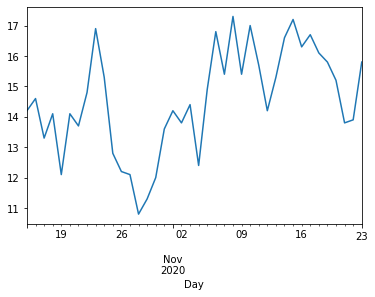

In [4]:
#Draw plot chart
prices["Sales"].plot()

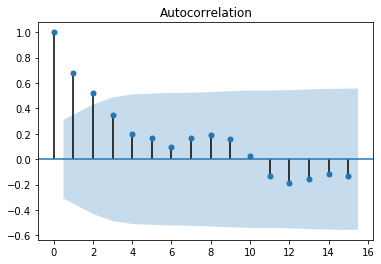

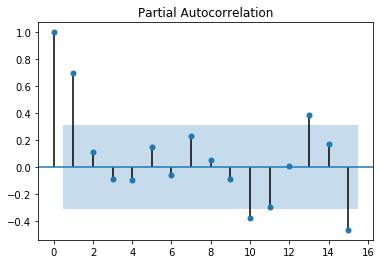

In [5]:
#Part II: Draw ACF and PACF Plot Charts to identify the order of AR or MA or ARMA model
sm.graphics.tsa.plot_acf(prices.values.squeeze(), lags=15) # You can change the lags value if you want to see more lags
sm.graphics.tsa.plot_pacf(prices.values.squeeze(), lags=15)
plt.show()

In [7]:
#Part III Run analysis model
#According to the ACF and PACF chart, we identify AR(1) model. 
#See this YouTube video if you don't know how to find the model.
#https://www.youtube.com/watch?v=CAT0Y66nPhs

mod = sm.tsa.SARIMAX(prices, order=(1, 0, 0))
res = mod.fit()
print(res.summary())
#As you can see in the result, p-value for the coefficient of ar.L1 is significant. 
#The Lung-Box test is not significant, meaning that the population error is zero. So, AR1 is a good model.
#If you run MA(1), change order parameter to order(0,0,1)
#If you run AR(1) after one lag differencing, change order parameter to order(1,1,0)


                           Statespace Model Results                           
Dep. Variable:                  Sales   No. Observations:                   40
Model:               SARIMAX(1, 0, 0)   Log Likelihood                 -71.240
Date:                Mon, 28 Dec 2020   AIC                            146.479
Time:                        11:51:21   BIC                            149.857
Sample:                    10-15-2020   HQIC                           147.700
                         - 11-23-2020                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.9959      0.015     67.772      0.000       0.967       1.025
sigma2         1.8292      0.622      2.939      0.003       0.609       3.049
Ljung-Box (Q):                         nan   Jarque-

In [9]:
#Part IV: Forecasting
#If you need to write the AR equation, you can use the analysis result above. The equestion should be
#Xsub(t) - 14.59= 0.68*(Xsub(t-1) - 14.59)+epsilon(t)
#Of course, Python can help us to forecast values even if you don't write the equation above.

#If forecast one day ahead
print(res.forecast(1))

#If forecast two days ahead
print(res.forecast(2))

2020-11-24    15.735381
Freq: D, dtype: float64
2020-11-24    15.735381
2020-11-25    15.671026
Freq: D, dtype: float64


In [55]:
#How to differencing data if there is a trend in original data?
from statsmodels.tsa.statespace.tools import diff 
diffprices=diff(prices, k_diff=1, k_seasonal_diff=None, seasonal_periods=1)